In [22]:
#Note: we only repeat this step from before, because this is a new .ipyb page.
#it only needs to be executed once per file.
#We'll import libraries as needed, but when submitting, having them all at the top is the best practice
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Reloading the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
df = pd.read_csv(url) #read CSV into Python as a dataframe

column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'type']
df = pd.read_csv(url, names = column_names) #read CSV into Python as a dataframe

#Choosing sepal-length as the independent variable. 
X = df.drop(columns=['sepal-length']) #indpendent variables
y = df[['sepal-length']].copy() #dependent variables

#split the variable sets into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=41)
X_train_no_type = X_train.drop(columns = ['type'])
X_test_no_type =  X_test.drop(columns = ['type'])

#process categorical 'type' feature
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, random_state=41)

(sup_reg_ex: develop: accuracy)=
# Accuracy Analysis

In the [Accuracy Analysis section of part D](task2_doc_d:accuracy_analysis) of your project's documentation, you will need to define and discuss how the metric for measuring the success of your application's algorithm. 

As we are trying to predict a continuous number, even the very best model will have errors in almost every prediction (if not, it's almost certainly [overfitted](https://en.wikipedia.org/wiki/Overfitting)). Whereas measuring the success of our classification model was a simple ratio, here we need a way to measure how much those predictions deviate from actual values. See sklearn's list of [metrics and scoring](https://scikit-learn.org/stable/modules/model_evaluation.html) for regression. Which metric is best depends on the needs of your project. However, any accuracy metric appropriate to your model will be accepted. 

To get some examples started, we'll use the data (with `type` and model from the previous sections. Recall, the model predicts a number for `sepal-length`.

In [23]:
from sklearn.linear_model import LinearRegression 

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train,y_train)
y_pred = linear_reg_model.predict(X_test)

(sup_reg_ex: develop: accuracy: MSE)=
## Mean Squared Error

The mean square error (MSE) measures the average of the squares of errors (difference between predicted and actual values). 

$$\text{MSE} = \frac{1}{n} \sum^{n}_{i=1} (Y_i - \hat{Y}_i)^{2}$$

Where $Y_i$ and $\bar{Y}_i$ are the $i^{\text{th}}$ actual and predicted values respectively.

In addition to giving positive values, squaring in the MSE emphasizes larger differences. Which can be good or bad depending on your needs. If your data has many or very large outliers, consider removing outliers or using the [mean absolute error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error). See the [sklearn MSE docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) for more info and examples.  

Applying the MSE to the *test* data, we have:

In [24]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.12921261168601364

(sup_reg_ex: develop: accuracy: MSE_example)=
### MSE explanation and example in 2D 

For illustration purposes, we'll use just the *petal-length* to predict the *sepal-length* with linear regression on 15 random values. For a multi-variable case, see the [example below](sup_reg_ex: develop: accuracy: MSE_2).

The regression line looks like this: 

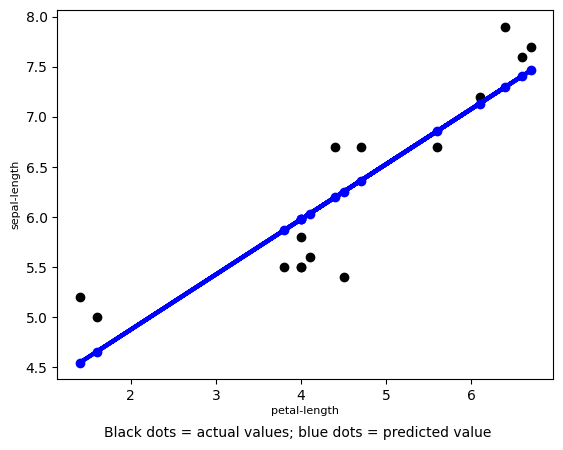

In [25]:
import matplotlib.pyplot as plt

x = X_train[['petal-length']]
x = x[-15:]
y = y_train[-15:]

# Create linear regression object
regr_ex = LinearRegression()
# Train the model using the training sets
regr_ex.fit(x, y)
y_pred_ex = regr_ex.predict(x)

fig, ax = plt.subplots()

plt.scatter(x, y, color="black")
plt.scatter(x, y_pred_ex, color="blue")
plt.plot(x, y_pred_ex, color="blue", linewidth=3);
ax.set_xlabel('petal-length', fontsize=8, labelpad=2)
ax.set_ylabel('sepal-length', fontsize=8)
plt.figtext(0.5, -0.01, "Black dots = actual values; blue dots = predicted value",
            wrap=True, horizontalalignment='center');

In [26]:
import matplotlib.pyplot as plt 
from IPython.display import display, HTML
import os

#This code helps support alt text for student accessibility.
#This section and uses of 'plot_with_alt' are intended only for publishing to the webpage.
#Including alt text is good practice but not required for Task 2.    
  
def plot_with_alt_text(alt_text =''):
     int = 0 #filename counter
     outputName = 'output_plot'+str(int)+'.png'
     match = True
     while(match == True):
          if os.path.isfile(outputName):
               int = int+1
               outputName = 'output_plot'+str(int)+'.png'
          else: match = False
     plt.savefig(outputName)
     plt.savefig('../../_build/html/task2_c/example_sup_reg/'+outputName, bbox_inches='tight')
     display(HTML(f'<img src="{outputName}" alt="{alt_text}">'))
     plt.close()

import matplotlib.pyplot as plt

x = X_train[['petal-length']]
x = x[-15:]
y = y_train[-15:]

# Create linear regression object
regr_ex = LinearRegression()
# Train the model using the training sets
regr_ex.fit(x, y)
y_pred_ex = regr_ex.predict(x)

fig, ax = plt.subplots()

plt.scatter(x, y, color="black")
plt.scatter(x, y_pred_ex, color="blue")
plt.plot(x, y_pred_ex, color="blue", linewidth=3);
ax.set_xlabel('petal-length', fontsize=8, labelpad=2)
ax.set_ylabel('sepal-length', fontsize=8)
plt.figtext(0.5, -0.01, "Black dots = actual values; blue dots = predicted value",
            wrap=True, horizontalalignment='center');
       
plot_with_alt_text('A scatterplot with a regression line is shown.' \
     + 'The x-axis is labeled sepal-length and has a range of 4.5 to 8.0.' \
     + 'The y-axis is labeled petal-length and has a range 1 to 7.'\
     + '15 black points are on the graph group around an upward-sloping blue regression line.' \
     + 'Each black point has a matching blue point on the blue regression line.' \
     + 'A caption below the image reads: Black dots = actual values; blue dots = predicted value.'
     )

The error squared looks like:

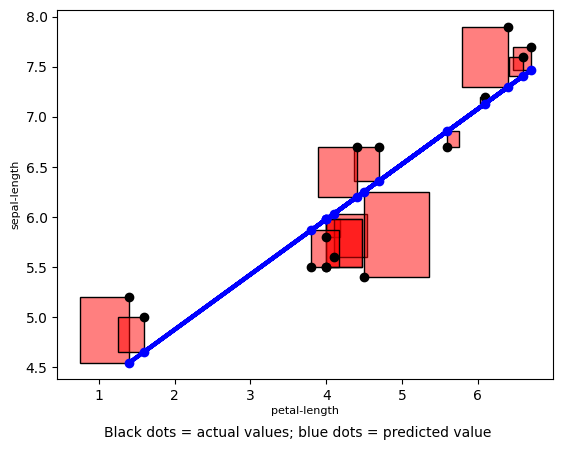

In [27]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()

i = 0
while i < len(x):
    a = float(x.values[i])
    b = float(y.values[i])
    c = float(y_pred_ex[i])
    error = float(y_pred_ex[i])-float(y.values[i])
    ax.add_patch(Rectangle((a, b), 
                           error, 
                           error,
                           fc=(1,0,0,0.5), ec=(0,0,0,1), lw=1)
                 )
    i = i+1

plt.scatter(x, y, color="black")
plt.scatter(x, y_pred_ex, color="blue")
ax.set_xlabel('petal-length', fontsize=8, labelpad=2)
ax.set_ylabel('sepal-length', fontsize=8)
plt.plot(x, y_pred_ex, color="blue", linewidth=3);
plt.figtext(0.5, -0.01, "Black dots = actual values; blue dots = predicted value", wrap=True, horizontalalignment='center', fontsize=10);


In [28]:
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()

i = 0
while i < len(x):
    a = float(x.values[i])
    b = float(y.values[i])
    c = float(y_pred_ex[i])
    error = float(y_pred_ex[i])-float(y.values[i])
    ax.add_patch(Rectangle((a, b), 
                           error, 
                           error,
                           fc=(1,0,0,0.5), ec=(0,0,0,1), lw=1)
                 )
    i = i+1

plt.scatter(x, y, color="black")
plt.scatter(x, y_pred_ex, color="blue")
ax.set_xlabel('petal-length', fontsize=8, labelpad=2)
ax.set_ylabel('sepal-length', fontsize=8)
plt.plot(x, y_pred_ex, color="blue", linewidth=3);
plt.figtext(0.5, -0.01, "Black dots = actual values; blue dots = predicted value", wrap=True, horizontalalignment='center', fontsize=10);

plot_with_alt_text('A scatterplot with a regression line and error squares is shown.' \
     + 'Red squares showing error measurement between the black and blue dots are shown on'\
     + 'The previous image. Keep reading for the full description.'
     + 'The x-axis is labeled sepal-length and has a range of 4.5 to 8.0.' \
     + 'The y-axis is labeled petal-length and has a range 1 to 7.'\
     + '15 black points are on the graph group around an upward-sloping blue regression line.' \
     + 'Each black point has a matching blue point on the blue regression line.' \
     + 'A caption below the image reads: Black dots = actual values; blue dots = predicted value.'
     )


Increasing the number of variables uses the same concept only the regression line becomes multi-dimensional. For example, additionally, including 'sepal-length' and 'petal-length' creates a *4-dimensional* line. So it's a little hard to visualize. Using the squares of the errors is standard but ME is sometimes easier for non-technical audiences to understand. 

(sup_reg_ex: develop: accuracy: MSE_2)=
##### MSE for Multivariable Regression

The case above presents Regression as most people are introduced to the concept -with two variables. Adding more variables does not change how MSE is computed, and the predicted values are still one-dimensional. However, visualizing the regression line can be [interesting](https://stats.stackexchange.com/questions/73320/how-to-visualize-a-fitted-multiple-regression-model) when there are more than two independent variables. One approach is to simply plot predicted and true values as paired data points. While some information about the model and relationship is lost, it does clearly show the model's accuracy.

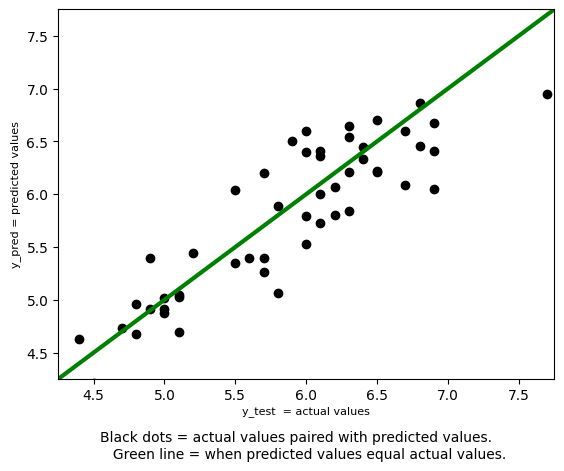

In [29]:
fig, ax = plt.subplots()
ax.set_ylim(4.25,7.75)
ax.set_xlim(4.25,7.75)
plt.scatter(y_test, y_pred, color="black")
plt.plot([0, 10], [0, 10], 'g', linewidth=3)
ax.set_xlabel('y_test  = actual values', fontsize=8, labelpad=2)
ax.set_ylabel('y_pred = predicted values', fontsize=8)
plt.figtext(0.5, -0.05, "Black dots = actual values paired with predicted values. \n \
    Green line = when predicted values equal actual values.", wrap=True, horizontalalignment='center');

In [30]:
fig, ax = plt.subplots()
ax.set_ylim(4.25,7.75)
ax.set_xlim(4.25,7.75)
plt.scatter(y_test, y_pred, color="black")
plt.plot([0, 10], [0, 10], 'g', linewidth=3)
ax.set_xlabel('y_test  = actual values', fontsize=8, labelpad=2)
ax.set_ylabel('y_pre(d = predicted values', fontsize=8)
plt.figtext(0.5, -0.05, "Black dots = actual values paired with predicted values. \n \
    green line = when predicted values equal actual values.", wrap=True, horizontalalignment='center');

plot_with_alt_text('A scatterplot with a green line is shown.' \
     + 'The x-axis is labeled y_test = actual values and has a range of 4.25 to 7.75.' \
     + 'The y-axis is labeled y_pred = predicted values and has a range 4.25 to 7.75.'\
     + '50 black dots are predicted values paired with test values.'\
     + 'A green line bisects the graph at a 45-degree angle running from the lower-left to the upper-right corner.' \
     + 'The black dots are scattered around the green line indicating a positive correlation.' \
     + 'A caption below the image reads: Black dots = actual values paired with predicted values. Green line = when predicted values equal actual values.'
     )

(sup_reg_ex: develop: accuracy: R)=
#### $R^{2}$, $r^{2}$, $R$, and $r$

:::{warning}
 These metrics are for *linear* models only! While they can be computed for any model, the results are not necessarily valid and can be misleading. For more details see [$R^{2}$ is Not Valid for Nonlinear Regression](https://statisticsbyjim.com/regression/r-squared-invalid-nonlinear-regression/) and this [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2892436/). 
 
 What's a linear model? See [Difference between a linear and nonlinear model](https://statisticsbyjim.com/regression/difference-between-linear-nonlinear-regression-models/) and sklearn's [Linear Models](https://scikit-learn.org/stable/modules/linear_model.html)
:::

These metrics (as with linear regression) have long been used in statistics before being adopted by the ML field. While ML uses these tools with a focus on results, statistics is a science so uses them differently. The overlap is the cause of some confusion and inconsistencies in the ML jargon. Here we'll quickly try to clarify some of that. If working on the data as a science, we recommend the [scipy library](https://docs.scipy.org/doc/scipy/reference/main_namespace.html). 

- *$r$:* the *(sample) correlation coefficient* is a statistic metric measuring the strength and direction of a *linear* relationship between two variables, e.g., $X$ and $Y$; sometimes denoted $R$. There are different types (usually [Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) when not specified) all having values in $[-1,1]$, with $\pm 1$ indicating the strongest possible negative/positive relationship and $0$ no relationship. Confusingly (maybe sloppily), sometimes $r$ denotes the non-multiple correlation between $Y$ and $\hat{Y}$ (values fitted by the model), in which case $r\geq 0$ (see the [image above](sup_reg_ex: develop: accuracy: MSE_example)). 

- *$R$*: the *coefficient of multiple correlation* or *correlation coefficient* measuring the Pearson correlation between observed, $Y$, and predicted values, $\hat{Y}$. $R=\sqrt{R^{2}}$ and $R\geq 0$ (assuming the model has an intercept) with higher values indicating better predictability of a linear model (as shown in the [image above](sup_reg_ex: develop: accuracy: MSE_2)).

- *$R^{2}$:* the *coefficient of determination* measures the proportion of the variation in the dependent variable predictable (by the linear model) from the independent variable(s), i.e., a metric measuring goodness of fit. The most general definition is: $R^{2}= 1 -\frac{SS_{\text{res}}}{SS_{\text{tot}}}$ where $SS_{\text{res}}=\sum_{i}(y_i-\hat{y}_i)^2$ (the [residual sum of squares](https://en.wikipedia.org/wiki/Residual_sum_of_squares)) and $SS_{\text{tot}}=\sum_{i}(y_i-\bar{y})^2$ (the [total sum of squares](https://en.wikipedia.org/wiki/Total_sum_of_squares)). The former sums squared differences between actual and model output, and the latter sums squared differences between actual outputs and the mean. When $SS_{\text{tot}}<SS_{\text{res}}$, i.e., the mean is a better predictor than the linear model, it's possible for $R^{2}$ to be negative.  

- *$r^{2}$:* $r^{2}$ is not *necessarily* $R^{2}$. For simple linear regression, [$R^{2}=r^{2}$](https://stats.stackexchange.com/questions/99669/the-equivalence-of-sample-correlation-and-r-statistic-for-simple-linear-regressi), but when the model lacks an intercept [things get more complicated](https://stats.stackexchange.com/questions/134167/is-there-any-difference-between-r2-and-r2#:~:text=In%20the%20case%20of%20simple%20linear%20regression%20specifically%2C,this%20means%20that%20R%20%3D%20%7C%20r%20%7C.), and unfortunately there are some inconsistencies in the notation. 

 $R^{2}$ and $r$ have can be more intuitively understood compared to the [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error) and similar metrics, e.g., [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error), [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error), and [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation) which have arbitrary. $r$ determines if variables are related, but since ML is more often concerned with how well a model predicts, $R^{2}$ is more frequently used. 

In [31]:
from sklearn.metrics import r2_score
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

r2_score(y_test, y_pred)


0.76202887109925

$76.2\%$. Is that good? Here, as with most ML models, our goal is predicting the dependent variable. To demonstrate how well our model fits to actual results (it's *goodness of fit*), the closer to $1$ the better. But what's close enough? That depends on how precise you need to be. Some fields demand a standard as high as $95\%$. However, as a percentage of the dependent variable variation explained by the independent variables, `0.76202` is a big chunk. Here's a rough, totally unofficial guideline:

| **$R^{2}$** | Interpetaion |
| -------- | ------- |
| $\geq 0.75$  | Significant variance explained! |
| $(0.75, .5]$ | Good amount explained. |
| $(0.5, .25]$ | Meh, some explained. |
| $(0.25, 0)$ | It's still better than nothing! |
| $\leq 0$ | You'd be better off using the mean. |

Conveniently, I've defined my model's performance as a great success 😃. But in reality this very subjective and depends on the situation, field, and data. See this discussion, [is there any rule of thumb for classifying $R^2$](https://stats.stackexchange.com/questions/154755/is-there-any-rule-of-thumb-to-classify-r2-as-small-medium-or-large-effect-si). Modeling complex and interesting situations will naturally be more difficult and should be held to different standard. In the behavioral sciences, the following guidelines for measuring the effect size are popular (as found {cite}`cohen2013statistical`):

| **$R^{2}$** | Effect |
| -------- | ------- |
| $\geq 0.26$ | Large |
| $0.13$ | Medium |
| $0.02$ | Small |

As any $R^{2} > 0$ provides a predictive value better than the mean, any positive $R^{2}$ can be argued to have value.

#### Margin of Error

The best way to measure your model's success depends on what you're trying to do. Say my flower customers want to predict `sepal-length` (I have no idea why), but any prediction within `0.5` of an inch would be acceptable. That is a "good" prediction, would be any falling with the dashed lines:

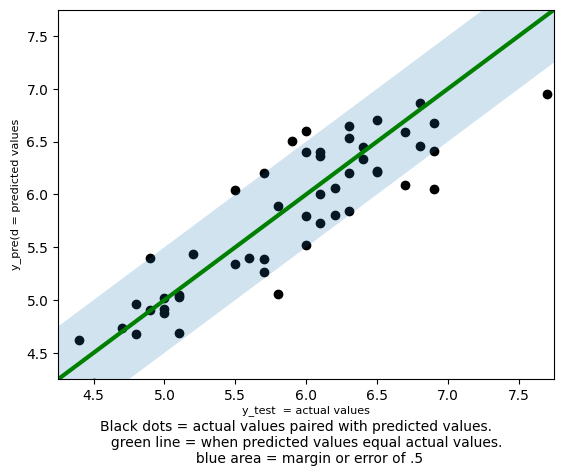

In [40]:
fig, ax = plt.subplots()
x_min, x_max = 4.25, 7.75
y_min, y_max = 4.25, 7.75
m = .5 # margin of error
x = np.linspace(x_min, x_max, 10)
ax.set_ylim(y_min, y_max)
ax.set_xlim(x_min, x_max)

plt.plot(x, x, 'g', linewidth=3)
plt.scatter(y_test, y_pred, color="black")
ax.fill_between(x, x - m, x + m, alpha=0.2)

ax.set_xlabel('y_test  = actual values', fontsize=8, labelpad=1)
ax.set_ylabel('y_pre(d = predicted values', fontsize=8)
plt.figtext(0.5, -0.06, "Black dots = actual values paired with predicted values. \n \
    green line = when predicted values equal actual values. \n \
    blue area = margin or error of .5", wrap=True, horizontalalignment='center' );


In [45]:
               
fig, ax = plt.subplots()
x_min, x_max = 4.25, 7.75                        
m = .5 # margin of error
x = np.linspace(x_min, x_max, 10)
ax.set_ylim(y_min, y_max)
ax.set_xlim(x_min, x_max)

plt.plot(x, x, 'g', linewidth=3)
plt.scatter(y_test, y_pred, color="black")
ax.fill_between(x, x - m, x + m, alpha=0.2)

ax.set_xlabel('y_test  = actual values', fontsize=8, labelpad=1)
ax.set_ylabel('y_pre(d = predicted values', fontsize=8)
plt.figtext(0.5, -0.06, "Black dots = actual values paired with predicted values. \n \
    green line = when predicted values equal actual values. \n \
    blue area = margin or error of .5", wrap=True, horizontalalignment='center' );

plot_with_alt_text('A scatterplot with a green line is shown.' \
     + 'The x-axis is labeled y_test = actual values and has a range of 4.25 to 7.75.' \
     + 'The y-axis is labeled y_pred = predicted values and has a range 4.25 to 7.75.'\
     + '50 black dots are predicted values paired with test values.'\
     + 'A green line bisects the graph at a 45-degree angle running from the lower-left to the upper-right corner.' \
     + 'The black dots are scattered around the green line indicating a positive correlation.' \
     + 'A blue area .5 above and below the green line shows the margin of error. Most black dots are within the blue area' \
     + 'A caption below the image reads: Black dots = actual values paired with predicted values. Green line = when predicted values equal actual values.' \
     + 'blue area = margin or error of .5.')

In [ ]:
def percent_within_moe(actual, predict, margin):
    total_correct = 0
    predict = predict.flatten() 
    actual = actual['sepal-length'].tolist()
    for y_actual, y_predict in zip(actual,predict):
        if abs(y_actual - y_predict) < margin:
            total_correct = total_correct+1
    percent_correct = total_correct/len(actual)
    return percent_correct

percent_within_moe(y_test, y_pred, .5)

0.84

So $84\%$ of predicted test values were within $\pm .5$ of being correct. In addition to being easy to interpret, this approach can be modified to meet the specific needs of your project. A stock exchange prediction model, for example, predicting within a range or not overpredicting (i.e. predicting a profit when a loss occurs) might matter more than the MSE. It also has the added flexibility of being able to define success. 

In [ ]:
percent_within_moe(y_test, y_pred, 1.5)

1.0

## Train and test other models

- See [sklearn's regression library](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
- See [sklearn's regression metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)